In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pickle
import h5py
from collections import Counter
from sklearn.manifold import TSNE

In [2]:
### B1.001 SIGN0 ###

B1001_sign0 = "/aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.001/sign0/sign0.h5"
with h5py.File(B1001_sign0) as h5:
    B1001_sign0 = np.array(h5['keys'])
B1001_sign0 = set([i.decode('utf-8') for i in B1001_sign0])


### B1.002 SIGN0 ###

B1002_sign0 = "/aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0/sign0.h5"
with h5py.File(B1002_sign0) as h5:
    B1002_sign0 = np.array(h5['keys'])
B1002_sign0 = set([i.decode('utf-8') for i in B1002_sign0])

print(len(B1001_sign0), len(B1002_sign0))

3972 6283


In [3]:
print(len(B1001_sign0.intersection(B1002_sign0)))

3972


In [4]:
# GET TYPE III SIGNATURE IF IT'S IN SIGN0  --  B1.001

# with h5py.File("/aloy/web_checker/current/full/B/B1/B1.001/sign3/sign3.h5") as h5:
#     keys = np.array([i.decode('utf-8') for i in h5['keys'][:]])
#     ind = np.array([c for c,i in enumerate(keys) if i in B1001_sign0])
#     X_B1001 = h5['V'][ind]


# GET TYPE III SIGNATURE IF IT'S IN SIGN0  --  B1.002

with h5py.File("/aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign3/sign3.h5") as h5:
    keys = np.array([i.decode('utf-8') for i in h5['keys'][:]])
    ind = np.array([c for c,i in enumerate(keys) if i in B1002_sign0])
    X_B1002 = h5['V'][ind]
    keys = keys[ind]
    labels = [i in B1001_sign0 for i in keys]
    
# print(X_B1001.shape, X_B1002.shape)
print(X_B1002.shape, len(labels))

ind1 = np.where(np.array(labels) == True)[0]
ind2 = np.where(np.array(labels) == False)[0]

(6194, 128) 6194


In [5]:
Counter(labels)

Counter({True: 3972, False: 2222})

In [6]:
tsne = TSNE(n_components=2, random_state=0, n_jobs=4)
X_tsne = tsne.fit_transform(X_B1002)

In [7]:
# RECAPITULATION MOA SIGN3 B1.001
ATC_ROC_B1001 = pickle.load(open("/aloy/web_checker/current/full/B/B1/B1.001/sign3/diags/2021_07_sign0_bkp/atc_roc.pkl", "rb"))
MOA_ROC_B1001 = pickle.load(open("/aloy/web_checker/current/full/B/B1/B1.001/sign3/diags/2021_07_sign0_bkp/moa_roc.pkl", "rb"))

# RECAPITULATION MOA SIGN3 B1.002
ATC_ROC_B1002 = pickle.load(open("/aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign3/diags/local_CC_B1_sign0/atc_roc.pkl", "rb"))
MOA_ROC_B1002 = pickle.load(open("/aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign3/diags/local_CC_B1_sign0/moa_roc.pkl", "rb"))

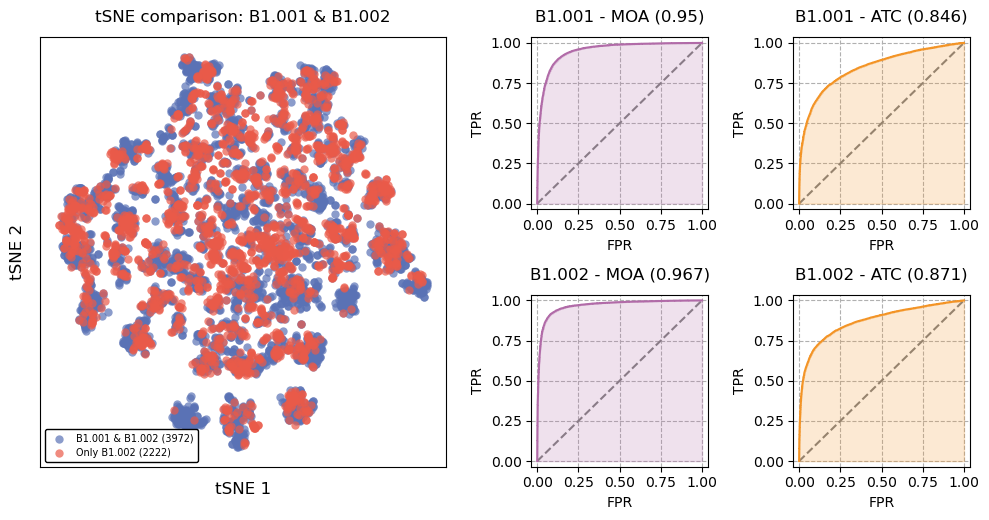

In [8]:
# Create a figure with a specific size
fig = plt.figure(figsize=(10, 5.3))

# Define the GridSpec
gs = gridspec.GridSpec(2, 3, width_ratios=[2.3, 1, 1], height_ratios=[1, 1])

# Left side: 1 large square plot
ax_main = plt.subplot(gs[:, 0])
ax_main.set_title("tSNE comparison: B1.001 & B1.002", pad=11)
ax_main.set_xticks([])
ax_main.set_yticks([])
ax_main.scatter(X_tsne[ind1][:, 0], X_tsne[ind1][:, 1], alpha=0.7, lw=0, c='#5A72B5', label="B1.001 & B1.002 (" + str(len(X_tsne[ind1])) + ")")
ax_main.scatter(X_tsne[ind2][:, 0], X_tsne[ind2][:, 1], alpha=0.7, lw=0, c='#EA5A49', label="Only B1.002 (" + str(len(X_tsne[ind2])) + ")")
ax_main.set_xlabel("tSNE 1", labelpad=11, size=12)
ax_main.set_ylabel("tSNE 2", labelpad=11, size=12)
ax_main.legend(framealpha=1, prop={'size': 7}, edgecolor='k')

        
labels = ["B1.001 - MOA (" + str(round(MOA_ROC_B1001['auc'], 3)) + ")", "B1.001 - ATC (" + str(round(ATC_ROC_B1001['auc'], 3)) + ")"]
colors = ['#B16BA8', '#F39426']
for c, p1 in enumerate([MOA_ROC_B1001, ATC_ROC_B1001]):
    ax = plt.subplot(gs[0, c+1])
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.grid(linestyle='--', zorder=-2)
    ax.set_xlim([-0.035, 1.035])
    ax.set_ylim([-0.035, 1.035])
    ax.plot([0, 1], [0, 1], c='gray', linestyle='--')
    ax.set_title(labels[c], pad=11)
    ax.plot(p1['fpr'], p1['tpr'], c=colors[c], zorder=2)
    ax.fill_between(p1['fpr'], p1['tpr'], y2=0, color=colors[c], zorder=2, alpha=0.2)
    
labels = ["B1.002 - MOA (" + str(round(MOA_ROC_B1002['auc'], 3)) + ")", "B1.002 - ATC (" + str(round(ATC_ROC_B1002['auc'], 3)) + ")"]
for c, p2 in enumerate([MOA_ROC_B1002, ATC_ROC_B1002]):
    ax = plt.subplot(gs[1, c+1])
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
    ax.grid(linestyle='--', zorder=-2)
    ax.set_xlim([-0.035, 1.035])
    ax.set_ylim([-0.035, 1.035])
    ax.plot([0, 1], [0, 1], c='gray', linestyle='--')
    ax.set_title(labels[c], pad=11)
    ax.plot(p2['fpr'], p2['tpr'], c=colors[c], zorder=2)
    ax.fill_between(p2['fpr'], p2['tpr'], y2=0, color=colors[c], zorder=2, alpha=0.2)
    

# Adjust layout
plt.tight_layout()
# plt.savefig("/aloy/home/acomajuncosa/Protocols/figures/Protocol/FigS3.png", dpi=300)
plt.show()